In [93]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [18]:
path="../data/YK_all2017-2019_accidents.csv"
traffic_df=pd.read_csv(path)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-9207,MapQuest,201.0,3,2017-01-01 00:17:36,2017-01-01 00:47:12,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017
1,A-9208,MapQuest,201.0,3,2017-01-01 00:26:08,2017-01-01 01:16:06,37.878185,-122.307175,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
2,A-9209,MapQuest,201.0,2,2017-01-01 00:53:41,2017-01-01 01:22:35,38.014820,-121.640579,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
3,A-9210,MapQuest,241.0,3,2017-01-01 01:18:51,2017-01-01 01:48:01,37.912056,-122.323982,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
4,A-9211,MapQuest,222.0,3,2017-01-01 01:20:12,2017-01-01 01:49:47,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017


In [256]:
traffic_df.count()

ID                       2563837
Source                   2563837
TMC                      1965015
Severity                 2563837
Start_Time               2563837
End_Time                 2563837
Start_Lat                2563837
Start_Lng                2563837
End_Lat                   598822
End_Lng                   598822
Distance(mi)             2563837
Description              2563836
Number                    928610
Street                   2563837
Side                     2563837
City                     2563781
County                   2563837
State                    2563837
Zipcode                  2563073
Country                  2563837
Timezone                 2560804
Airport_Code             2558452
Weather_Timestamp        2530471
Temperature(F)           2514321
Wind_Chill(F)            1080688
Humidity(%)              2511771
Pressure(in)             2520881
Visibility(mi)           2507022
Wind_Direction           2522105
Wind_Speed(mph)          2200487
Precipitat

In [273]:
source_df=traffic_df.groupby(['Year','Source']).agg({'ID':'count'}).unstack('Source')
source_df.columns

MultiIndex([('ID',          'Bing'),
            ('ID',      'MapQuest'),
            ('ID', 'MapQuest-Bing')],
           names=[None, 'Source'])

2017
170097 538947 8445
2018
166941 713613 12061
2019
261784 672102 19847


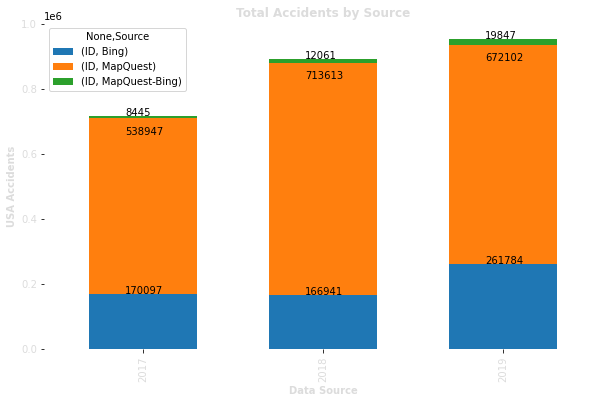

In [302]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot_ser=source_df
plot1=plot_ser.plot.bar(rot=90,width=0.6, stacked=True)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Data Source', fontweight="bold", color=color_t)
plt.ylabel('USA Accidents',fontweight='bold', color=color_t)
plt.title("Total Accidents by Source", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
for i, r in plot_ser.iterrows():
    print(i)
    off=50000
    d1=r[0]
    d2=r[1]
    d3=r[2]
    print(d1,d2,d3)
#    x=plot_ser.index[i]
    plt.text(i-2017-0.1, y =d1 , s=f"{d1}" , fontdict=dict(fontsize=10))
    plt.text(i-2017-.1, y =d2+d1-off , s=f"{d2}" , fontdict=dict(fontsize=10))
    plt.text(i-2017-0.1, y =d3+d1+d2 , s=f"{d3}" , fontdict=dict(fontsize=10))
#plt.ylabel('Count')

In [19]:
traffic_df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')

In [9]:
traffic_df['Start_Time'][0]

'2017-01-01 00:17:36'

In [131]:
date_df=pd.DataFrame()
date_df['date_time_obj']=pd.to_datetime(traffic_df['Start_Time'])

In [132]:
date_df['Date']=date_df['date_time_obj'].dt.date

In [133]:
date_df['Year']=date_df['date_time_obj'].dt. year

In [134]:
date_df['Month']=date_df['date_time_obj'].dt. month

In [135]:
date_df['Weekday']=date_df['date_time_obj'].dt.weekday

In [136]:
date_df['Severity']=traffic_df['Severity']

In [137]:
date_df['ID']=traffic_df['ID']

In [138]:
date_df

,date_time_obj,Date,Year,Month,Weekday,Severity,ID
0,2017-01-01 00:17:36,2017-01-01,2017,1,6,3,A-9207
1,2017-01-01 00:26:08,2017-01-01,2017,1,6,3,A-9208
2,2017-01-01 00:53:41,2017-01-01,2017,1,6,2,A-9209
3,2017-01-01 01:18:51,2017-01-01,2017,1,6,3,A-9210
4,2017-01-01 01:20:12,2017-01-01,2017,1,6,3,A-9211
...,...,...,...,...,...,...,...
2563832,2019-08-23 18:03:25,2019-08-23,2019,8,4,2,A-3513776
2563833,2019-08-23 19:11:30,2019-08-23,2019,8,4,2,A-3513777
2563834,2019-08-23 19:00:21,2019-08-23,2019,8,4,2,A-3513778
2563835,2019-08-23 19:00:21,2019-08-23,2019,8,4,2,A-3513779


In [210]:
year_rate=date_df.groupby(['Year','Month']).agg({'Date':'count'})
year_rate

Date
Year Month        
2017 1       55680
     2       51640
     3       57283
     4       48087
     5       41106
     6       46221
     7       43226
     8       80878
     9       76820
     10      74905
     11      70074
     12      71569
2018 1       74999
     2       71464
     3       74423
     4       72592
     5       76475
     6       67777
     7       65749
     8       76381
     9       73277
     10      87195
     11      82078
     12      70205
2019 1       79276
     2       74559
     3       69401
     4       73001
     5       73864
     6       65501
     7       68234
     8       75246
     9       87659
     10     106817
     11      81894
     12      98281

Text(0, 0.5, 'Count')

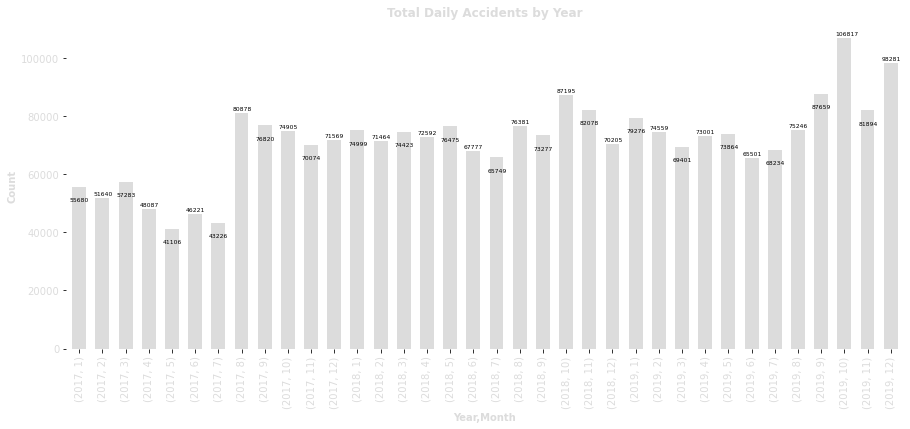

In [260]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plot5= plt.subplot(111)
plot5.spines["top"].set_visible(False)    
plot5.spines["bottom"].set_visible(False)    
plot5.spines["right"].set_visible(False)    
plot5.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Year', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.title("Total Daily Accidents by Year", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plot_ser=year_rate['Date']
plot5=plot_ser.plot.bar(rot=90,color=color_t,width=0.6)
for i,d in enumerate(plot_ser):
    if i%2==0:
        off=5000
    else:
        off=-1000
    plt.text(x=i-.4 , y =d-off , s=f"{d}" , fontdict=dict(fontsize=6))
plt.ylabel('Count')    



In [232]:
#date_df.drop(date_df.loc[date_df['Year']==2017].index)
date_df=date_df[date_df['Year']!=2017]

In [233]:
month_rate=date_df.groupby(['Month']).agg({'Date':'count'})

In [234]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

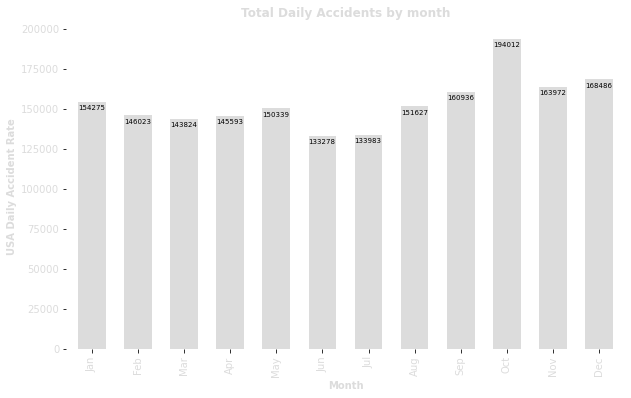

In [255]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x=month_rate.index
y=month_rate['Date']
plot5=month_rate['Date'].plot.bar(rot=90,color=color_t,width=0.6)
plt.title("Total Daily Accidents by month", fontweight="bold", color=color_t)    
plt.xlabel('Month', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,12),months, color=color_t,fontsize=10)
for i,d in enumerate(month_rate['Date']):
    plt.text(x=i-.3 , y =d-5000 , s=f"{d}" , fontdict=dict(fontsize=7))

In [236]:
weekday_rate=date_df.groupby(['Weekday']).agg({'Date':'count','Month':'mean'})
weekday_rate

,Date,Month
Weekday,,
0,317607,6.763166
1,336135,6.638901
2,329709,6.606947
3,317788,6.536719
4,331607,6.738944
5,113394,7.045293
6,100108,7.068976


In [244]:
daily_accidents={}
daily_stats=pd.DataFrame()
for i in range(0,7):
    daily_accidents[i]=date_df.loc[date_df['Weekday']==i].groupby(['Date']).agg({'Date':'count', 'Year':'mean','Month':'mean'})
    daily_stats[i]=daily_accidents[i].describe()['Date']

In [245]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
daily_stats

,0,1,2,3,4,5,6
count,105.000000,105.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3024.828571,3201.285714,3170.278846,3055.653846,3188.528846,1090.326923,962.576923
std,522.612253,567.777139,569.834135,694.692287,513.534959,357.275109,303.716196
min,980.000000,682.000000,1278.000000,985.000000,1668.000000,2.000000,202.000000
25%,2770.000000,2872.000000,2879.250000,2832.000000,2872.500000,904.750000,789.250000
50%,2941.000000,3115.000000,3110.500000,3080.500000,3102.000000,982.000000,887.000000
75%,3297.000000,3526.000000,3476.000000,3387.250000,3463.250000,1114.250000,992.500000
max,4420.000000,4626.000000,4883.000000,4566.000000,4568.000000,2245.000000,2092.000000


In [246]:
daily_accidents[0]

,Date,Year,Month
Date,,,
2018-01-01,980,2018,1
2018-01-08,3752,2018,1
2018-01-15,2776,2018,1
2018-01-22,2822,2018,1
2018-01-29,3115,2018,1
...,...,...,...
2019-12-02,2753,2019,12
2019-12-09,4420,2019,12
2019-12-16,3795,2019,12



 0  
 iqr= 527.0
 UPPER OUTLIER   
             Date  Year  Month
Date                         
2019-10-21  4151  2019     10
2019-12-09  4420  2019     12
2019-12-23  4303  2019     12
 LOWER OUTLIER   
             Date  Year  Month
Date                         
2018-01-01   980  2018      1
2018-05-28  1860  2018      5
2018-09-03  1644  2018      9
2019-05-27  1734  2019      5
----------------------------------------

 1  
 iqr= 654.0
 UPPER OUTLIER   
             Date  Year  Month
Date                         
2019-11-12  4626  2019     11
 LOWER OUTLIER   
             Date  Year  Month
Date                         
2018-12-25   682  2018     12
2019-01-01  1177  2019      1
----------------------------------------

 2  
 iqr= 596.75
 UPPER OUTLIER   
             Date  Year  Month
Date                         
2019-10-16  4417  2019     10
2019-11-06  4385  2019     11
2019-11-13  4463  2019     11
2019-12-04  4883  2019     12
2019-12-11  4450  2019     12
 LOWER OUTLIER   


<function matplotlib.pyplot.show(*args, **kw)>

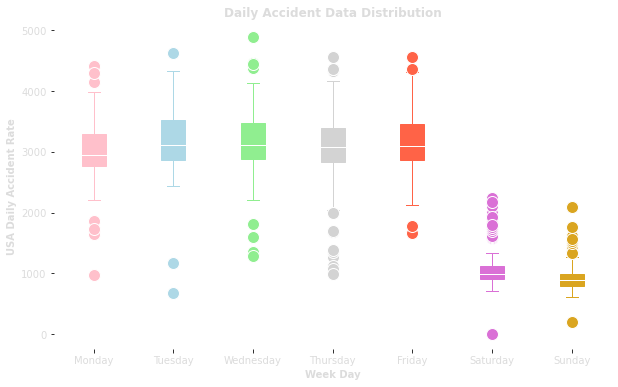

In [247]:
upper_outlier={}
lower_outlier={}
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
colors = ['pink', 'lightblue', 'lightgreen', 'lightgrey','tomato','orchid','goldenrod']    # colors for plot
for i in range(0,7):                                
    data=daily_accidents[i]['Date'] 
    upperq =daily_stats[i]['75%']
    lowerq =daily_stats[i]['25%']
    iqr = upperq - lowerq                                    # iqr                      
    upper_outlier[i]=daily_accidents[i].loc[data>upperq+iqr*1.5]  # finding and storing all upper outliers
    lower_outlier[i]=daily_accidents[i].loc[data<lowerq-iqr*1.5]  # finding and storing all lower outliers
    # printing results
    print('\n\033[1m\033[4m', i,'\033[0m \n','\033[1miqr=\033[0m',iqr)
    if upper_outlier.empty:
        print('\033[1m UPPER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m UPPER OUTLIER \033[0m ','\n',upper_outlier)
    if lower_outlier.empty:
        print('\033[1m LOWER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m LOWER OUTLIER \033[0m ','\n',lower_outlier)
    print("-"*40)
    c=colors[i]                             # color for each regiment chart
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# "Data-Ink Ratio" applied
    plot1.boxplot(data, 
                  patch_artist=True, widths=0.3,labels=[i],
                  boxprops=dict(facecolor=c, color=c),
                  capprops=dict(color=c),
                  whiskerprops=dict(color=c),
                  flierprops=dict(marker='o',markerfacecolor=c,markeredgecolor="white",markersize=12, label="shown"),
                  medianprops=dict(color='white'),
                  positions=[i])

plt.title("Daily Accident Data Distribution", fontweight="bold", color=color_t)    
plt.xlabel('Week Day', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,7),weekdays, color=color_t,fontsize=10)
#plt.label()
plt.show

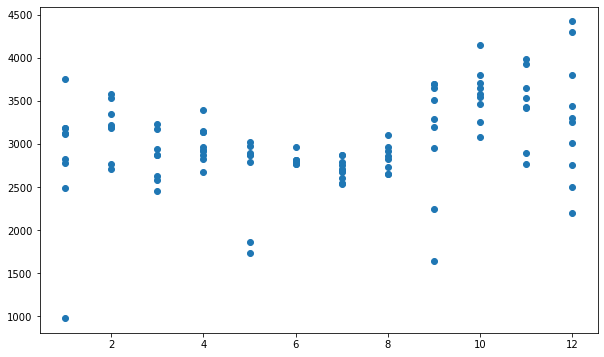

In [248]:
plot2=plt.scatter(daily_accidents[0]['Month'],daily_accidents[0]['Date'])

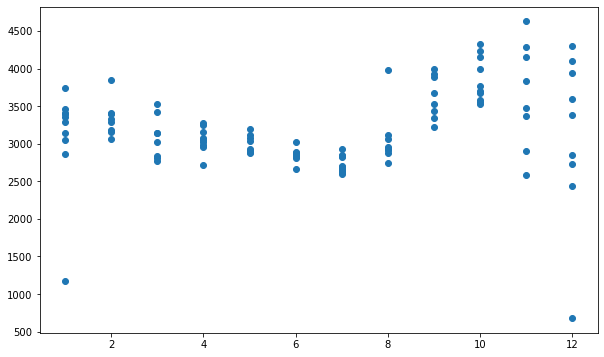

In [249]:
y=daily_accidents[1]['Date']
plot2=plt.scatter(daily_accidents[1]['Month'],y)

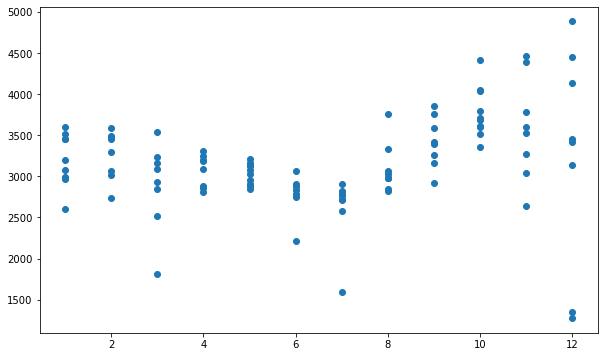

In [250]:
plot2=plt.scatter(daily_accidents[2]['Month'],daily_accidents[2]['Date'] )

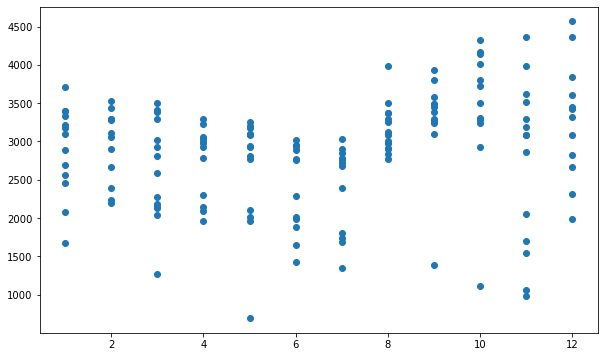

In [243]:
plot2=plt.scatter(daily_accidents[3]['Month'],daily_accidents[3]['Date'] )